In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/data science/Data Preprocessing/1stLab/Data.csv")
iris_df = pd.read_csv("/content/drive/MyDrive/Iris.csv")

# <font color='cadetblue'>2- Import all the crucial libraries</font>
 The predefined Python libraries can perform specific data preprocessing jobs. Importing all the crucial libraries is the second step in data preprocessing in machine learning.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split


# <font color='cadetblue'>3- Import the dataset</font>
In this step, you need to import the dataset/s that you have gathered for the ML project at hand. Importing the dataset is one of the important steps in data preprocessing in machine learning.


Outlier Detection:


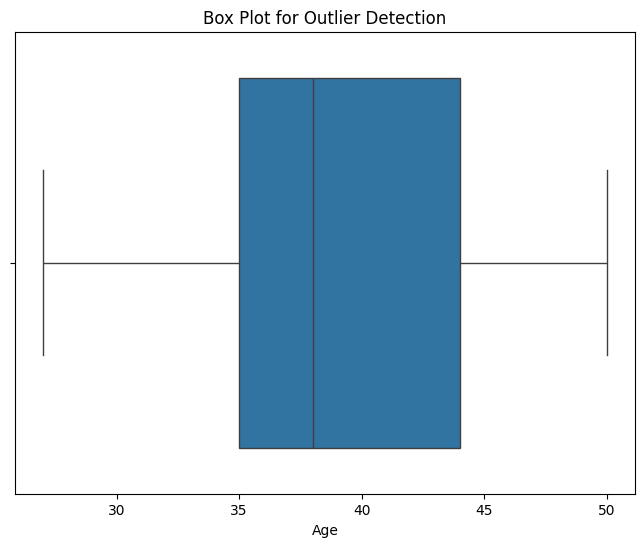

In [ ]:

# Assuming 'numerical_column' is the column with numerical data
# Checking for outliers using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot for Outlier Detection')
plt.show()


Handling outliers and noisy data:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data, iris.target
iris_df_copy = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])
np.random.seed(42)
outliers_idx = np.random.choice(iris_df_copy.index, size=10, replace=False)
iris_df_copy.loc[outliers_idx, 'sepal length (cm)'] += 10
iris_df_copy.loc[outliers_idx, 'sepal width (cm)'] -= 5
X = iris_df_copy.drop('target', axis=1)
y = iris_df_copy['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
outlier_detector = IsolationForest(contamination=0.06, random_state=42)
outliers_mask = outlier_detector.fit_predict(X_scaled) == -1 # -1 indicates an outlier, label it as true
X_no_outliers = X[~outliers_mask]
y_no_outliers = y[~outliers_mask]
print(f"Number of removed outliers: {sum(outliers_mask)}")

Number of removed outliers: 9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Data Science/data science/Data Preprocessing/1stLab/Data.csv")

Data Visualization:

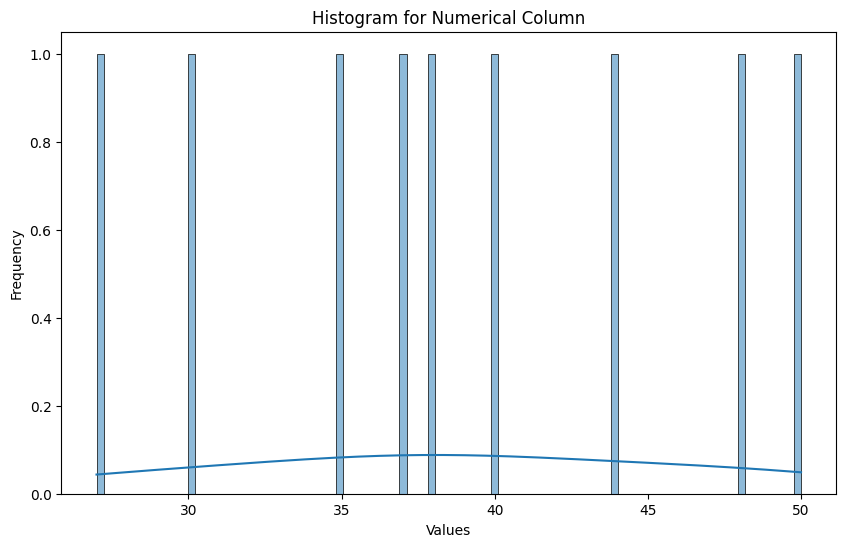

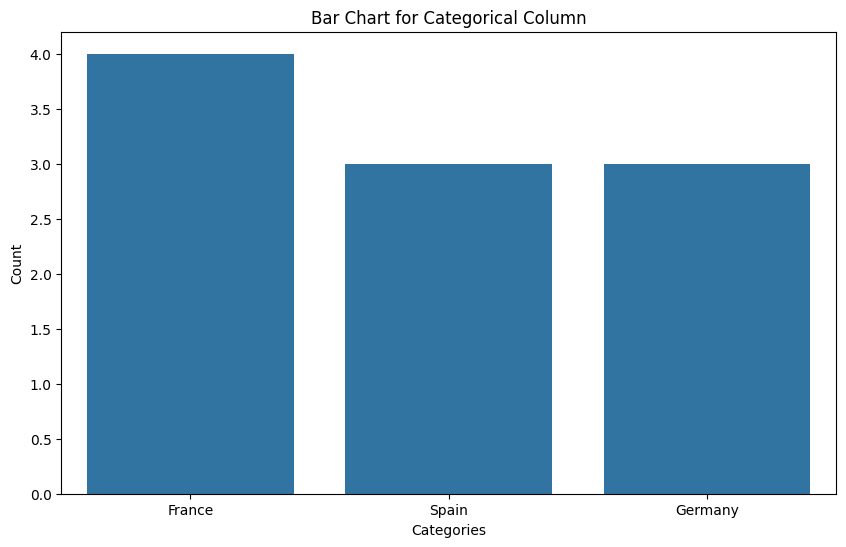

In [ ]:
numerical_column = 'Age'
categorical_column = 'Country'
plt.figure(figsize=(10, 6))
sns.histplot(df[numerical_column], bins=100, kde=True)#kde: Kernel Density Estimation
plt
plt.title('Histogram for Numerical Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(x=df[categorical_column])
plt.title('Bar Chart for Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


In [ ]:
#iris_df.head()
#print(iris_df['Species'].value_counts())

# Total missing values
mis_val = df.isnull().sum()

# Percentage of missing values
mis_val_percent = 100 * df.isnull().sum() / len(df)
#print(mis_val,mis_val_percent)

# Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
print(mis_val_table)

           0     1
Country    0   0.0
Age        1  10.0
Salary     1  10.0
Purchased  0   0.0


Drop Columns That Aren’t Useful:
- Let's try to drop some of the columns which won't contribute much to our machine learning model.

In [ ]:
copy_df=df.copy()
columns=['Country']
copy_df.drop(columns,inplace=True,axis=1)
copy_df

,Age,Salary,Purchased
0,44.0,72000.0,No
1,27.0,48000.0,Yes
2,30.0,54000.0,No
3,38.0,61000.0,No
4,40.0,NaN,Yes
5,35.0,58000.0,Yes
6,NaN,52000.0,No
7,48.0,79000.0,Yes
8,50.0,83000.0,No
9,37.0,67000.0,Yes


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


# <font color='dodgerblue'>4- Identifying and handling the missing values</font>
In data preprocessing, it is pivotal to identify and correctly handle the missing values, failing to do this, you might draw inaccurate and faulty conclusions and inferences from the data. Needless to say, this will hamper your ML project.

some typical reasons why data is missing:

A. User forgot to fill in a field.

B. Data was lost while transferring manually from a legacy database.

C. There was a programming error.

D. Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

Basically, there are two ways to handle missing data:
    
    Deleting a particular row – Calculating the mean

# <img src="https://files.realpython.com/media/Pythons-None-Type-Null-in-Python_Watermarked.9d48d487f417.jpg" width="70%"/>


In [ ]:
print(df.isnull())
df.isnull().sum()

df1 = df.copy()

# summarize the shape of the raw data
print("Before:",df1.shape)

# drop rows with missing values
df1.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print("After:",df1.shape)

   Country    Age  Salary  Purchased
0    False  False   False      False
1    False  False   False      False
2    False  False   False      False
3    False  False   False      False
4    False  False    True      False
5    False  False   False      False
6    False   True   False      False
7    False  False   False      False
8    False  False   False      False
9    False  False   False      False
Before: (10, 4)
After: (8, 4)


In [ ]:
df2 = df.copy()
# fill missing values with mean column values
df2.fillna(df2['Age'].mean(), inplace=True)
# count the number of NaN values in each column
print(df2.isnull().sum())

# interpolation: df.interpolation - ex: linear / timebased
df2.interpolate()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_6848\3703752423.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df2.interpolate()


,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,38.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


Using Scikit Learn:


Filling the missing values:


In [ ]:
#Forward fill, fills the missing value with the values above it.

df1.fillna(method="ffill")

#Back fill, fills the missing value with the values below it.

df1.fillna(method="bfill")

#Interploation finds the average for the above and below value and uses the value to fill the missing value

df1.interpolate()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6848\567396442.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method="ffill")
C:\Users\DELL\AppData\Local\Temp\ipykernel_6848\567396442.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method="bfill")
C:\Users\DELL\AppData\Local\Temp\ipykernel_6848\567396442.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df1.interpolate()


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
#to lowercase
# df1.columns.str.lower()

#to uppercase
# df1.columns.str.upper()

In [ ]:
df1.rename(columns={"Purchased": "Bought"},inplace=True)
df1

,Country,Age,Salary,Bought
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
print("Shape of the data frame: ",iris_df.shape)
print("Total null values: ",iris_df.isna().sum())
print("Duplicate values: ",iris_df.duplicated().sum())


Shape of the data frame:  (150, 6)
Total null values:  Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Duplicate values:  0


# Handling Categorical Data

In [ ]:
import plotly.express as px
# check value counts of Species column
df1
iris_counts = df['Country'].value_counts()
print(iris_counts)
fig = px.bar(x=iris_counts.index, y=iris_counts.values)
fig.show()


Country
France     4
Spain      3
Germany    3
Name: count, dtype: int64


In [ ]:
iris_df.groupby(by = 'Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


**One-hot encoding**

One hot encoding is a process of representing categorical data as a set of binary values, where each category is mapped to a unique binary value. In this representation, only one bit is set to 1, and the rest are set to 0, hence the name "one hot." This is commonly used in machine learning to convert categorical data into a format that algorithms can process.

![](https://miro.medium.com/v2/resize:fit:1200/1*ggtP4a5YaRx6l09KQaYOnw.png)

In [ ]:
df_encoded = pd.get_dummies(iris_df["Species"])
df_encoded .head()


iris_df['Species'].value_counts()

dummies = pd.get_dummies(iris_df.Species)
dummies = pd.get_dummies(df1['Country'])
print("dummies:")
print(dummies)

#Concate the newly created dummy variables with the loaded data and store in merged_data
merged_data = pd.concat([iris_df,dummies], axis=1)
#Display merged_data
merged_data.tail()

dummies:
   France  Germany  Spain
0    True    False  False
1   False    False   True
2   False     True  False
3   False    False   True
5    True    False  False
7    True    False  False
8   False     True  False
9    True    False  False


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,France,Germany,Spain
145,146,6.7,3.0,5.2,2.3,2,NaN,NaN,NaN
146,147,6.3,2.5,5.0,1.9,2,NaN,NaN,NaN
147,148,6.5,3.0,5.2,2.0,2,NaN,NaN,NaN
148,149,6.2,3.4,5.4,2.3,2,NaN,NaN,NaN
149,150,5.9,3.0,5.1,1.8,2,NaN,NaN,NaN


In [ ]:
# This LabelBinarizer class is one of the preprcocessing techniques that is defined in the preprocessing module
# the main function that is transforming the labeled text data of the target into binary coded numbers so that the knn classifier will be able to deal with it
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

label_binarizer = LabelBinarizer()
y_train=["setosa","setosa","virginica","setosa","setosa","setosa","virginica","versicolor","virginica","versicolor","virginica"]
# fitting means perform the calculation of the algorithm like that label binarizer one and transform means transforming the data after fitting directly and return the final shape of encoded data
# encoded_y_train = label_encoding.fit_transform(iris_df.Species)
encoded_y_train = label_binarizer.fit_transform(y_train)

encoded_y_train

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

LabelBinarizer is specifically designed for binary classification tasks and outputs a binary array for each sample.

One-hot encoding is a more general technique suitable for handling categorical variables with multiple categories, and it outputs a binary matrix.

**label encoding**

In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
iris_df['Species']= label_encoder.fit_transform(iris_df['Species'])

iris_df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

# Handling Duplicate Data

In [ ]:

# Here, I'm creating a sample DataFrame for demonstration purposes
data = {'ID': [1, 2, 3, 4, 1],
        'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Alice'],
        'Amount': [100.0, 200.0, 150.0, 200.0, 100.0]}
creditcard_df = pd.DataFrame(data)

# Display the original dataset
print("Original Dataset:")
print(creditcard_df)

# Check for duplicate rows
duplicate_rows = creditcard_df[creditcard_df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

# Remove duplicates and keep the first occurrence
creditcard_df_no_duplicates = creditcard_df.drop_duplicates()

# Display the dataset after removing duplicates
print("\nDataset after removing duplicates:")
print(creditcard_df_no_duplicates)


Original Dataset:
   ID     Name  Amount
0   1    Alice   100.0
1   2      Bob   200.0
2   3  Charlie   150.0
3   4    David   200.0
4   1    Alice   100.0

Duplicate Rows:
   ID   Name  Amount
4   1  Alice   100.0

Dataset after removing duplicates:
   ID     Name  Amount
0   1    Alice   100.0
1   2      Bob   200.0
2   3  Charlie   150.0
3   4    David   200.0


In [ ]:
#dataset = pd.read_csv("./datasets/sampledata/Data.csv")

Iris_dataset = pd.read_csv("/content/drive/MyDrive/Iris.csv")

#df = pd.DataFrame(dataset)
iris_df = pd.DataFrame(Iris_dataset)

iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# <font color='dodgerblue'>6- Handling imbalanced datasets</font>


In [ ]:
creditcard_df = pd.read_csv('/content/drive/MyDrive/Data Science/data science/Data Preprocessing/secondLab/datasets/creditcard/creditcard.csv')
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditcard_df = creditcard_df.drop(['Time'],axis=1)
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

0    284315
1       492
Name: Class, dtype: int64
Class 0 :  284315
Class 1 :  492


<Axes: title={'center': 'Label Count'}>

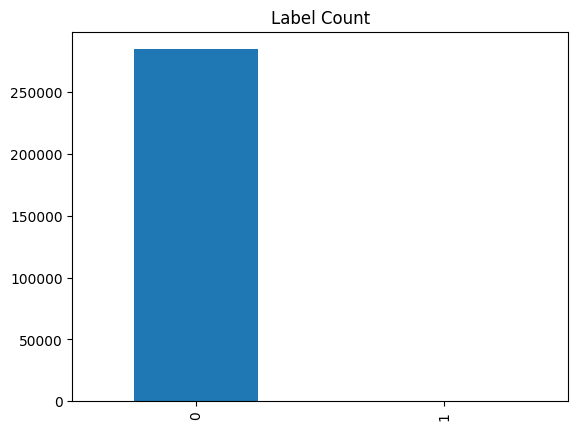

In [ ]:
label_count = creditcard_df.Class.value_counts()
print(label_count)

print('Class 0 : ', label_count[0])
print('Class 1 : ', label_count[1])
label_count.plot(kind='bar',title='Label Count')

In [ ]:
c_class_0, c_class_1 = creditcard_df.Class.value_counts()

data_class_0 = creditcard_df[creditcard_df['Class']==0]
data_class_1 = creditcard_df[creditcard_df['Class']==1]

<Axes: title={'center': 'Under Sampling'}>

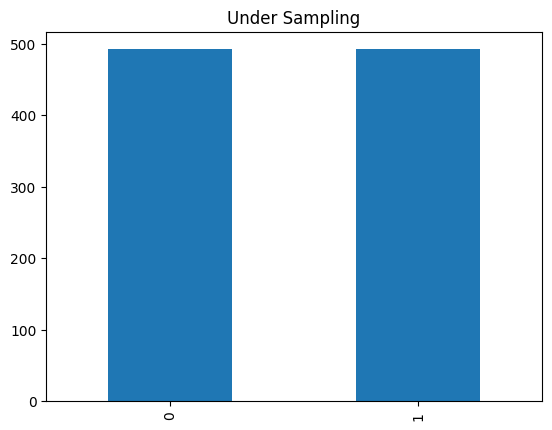

In [ ]:
data_class_0_under = data_class_0.sample(c_class_1)
# Here we are reducing the number of records with 0 as label to that of number of records equal to 1
# Pandas sample() is used to randomly select passed number of records

data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)
#Concatening the data one after the other to create one single dataframe containing all the data

data_test_under.Class.value_counts().plot(kind='bar',title='Under Sampling')

After Random Over-sampling
Class
0    284315
1    284315
Name: count, dtype: int64


<Axes: title={'center': 'Random Over-Sampling'}, xlabel='Class'>

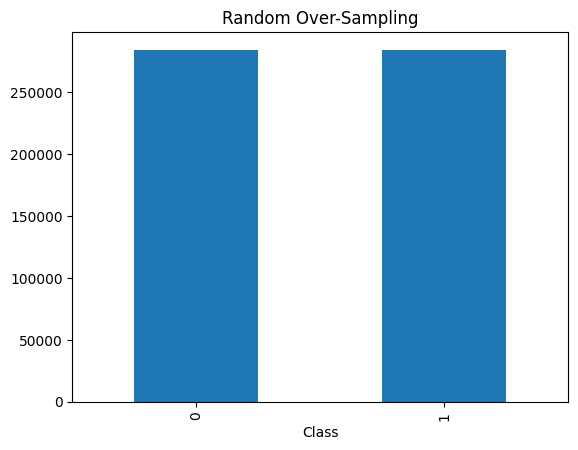

In [ ]:
data_class_1_over = data_class_1.sample(c_class_0, replace=True)
# Here we are increasing number of records for label 1 by randomly generating data
data_test_over = pd.concat([data_class_0, data_class_1_over])
print("After Random Over-sampling")
print(data_test_over.Class.value_counts())
data_test_over.Class.value_counts().plot(kind='bar',title='Random Over-Sampling')

# **SMOTE**
**Synthetic Minority Oversampling Technique - what it basically does is for minority class (class with less number of records in dataset), it calculates Nearest Neighbor values of the records selected randomly. It is Over sampling method**

Class distribution before SMOTE: Counter({0: 284315, 1: 492})
Class distribution after SMOTE: Counter({0: 227441, 1: 227441})


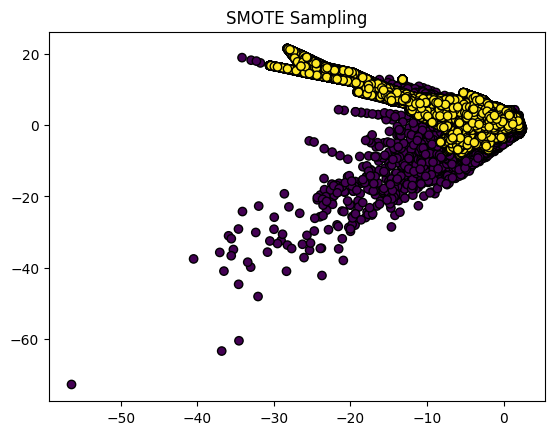

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Load the creditcard dataset
print("Class distribution before SMOTE:", Counter(creditcard_df['Class']))

# Separate features and target variable
X = creditcard_df.drop('Class', axis=1)
y = creditcard_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert X_train_resampled to a DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# Display class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Now you can use X_train_resampled_df and y_train_resampled for training your model
# and X_test, y_test for testing
# Optionally, visualize the results
plt.scatter(X_train_resampled_df.iloc[:, 0], X_train_resampled_df.iloc[:, 1], c=y_train_resampled, edgecolors='k', marker='o')
plt.title("SMOTE Sampling")
plt.show()



# <font color='dodgerblue'>7- Dimensionality reduction</font>
**Dimensionality reduction is a technique used to reduce the number of features in a dataset while retaining as much of the important information as possible. In other words, it is a process of transforming high-dimensional data into a lower-dimensional space that still preserves the essence of the original data.**


- The various methods used for dimensionality reduction include:

Principal Component Analysis (PCA)
Linear Discriminant Analysis (LDA)
Generalized Discriminant Analysis (GDA)


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you already have the dataset loaded into creditcard_df
# If not, replace this line with your actual loading code

# Separate features and target variable
X = creditcard_df.drop('Class', axis=1)
y = creditcard_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to reduce dimensionality
n_components = 10  # Set the desired number of components
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)

# Display the explained variance ratio
print("Explained Variance Ratio:", sum(pca.explained_variance_ratio_))

# Apply the same transformation to the test set
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# Now you can use X_train_pca and X_test_pca for training and testing your model


Explained Variance Ratio: 0.3813631872679605


# <font color='dodgerblue'>8- Data normalization and standardization</font>
**Data normalization is a vital pre-processing, mapping, and scaling method that helps forecasting and prediction models become more accurate.**

**Normalisation, which involves reshaping numerical columns to conform to a standard scale, is essential for datasets with different units or magnitudes across different features.**

- Advantages:

1- Ensures that features with different scales are brought to a standard scale.

2- Prevents any single feature from dominating others during model training.

3- Particularly helpful for algorithms sensitive to feature scales, such as gradient descent-based optimization algorithms.

**Data standardization rescales the features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1.**



- Advantages:

1- Ensures that features contribute equally to the model's training.

2- Important for algorithms relying on distance measures, like k-nearest neighbors or clustering algorithms.

3- Helps in situations where the underlying assumption of the model is that the features are normally distributed.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Here, I'm creating a sample DataFrame for demonstration purposes

# Display the original dataset
print("Original Dataset:")
print(creditcard_df)

# Standardization
scaler_standard = StandardScaler()
creditcard_standardized = pd.DataFrame(scaler_standard.fit_transform(creditcard_df), columns=creditcard_df.columns)

# Display the standardized dataset
print("\nStandardized Dataset:")
print(creditcard_standardized)

# Normalization
scaler_minmax = MinMaxScaler()
creditcard_normalized = pd.DataFrame(scaler_minmax.fit_transform(creditcard_df), columns=creditcard_df.columns)

# Display the normalized dataset
print("\nNormalized Dataset:")
print(creditcard_normalized)


Original Dataset:
               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.363787  0.09

# <font color='dodgerblue'>9- Feature Engineering</font>
**Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself**


- So, feature engineering is the process of creating useful features in a machine learning model. We can see that the success of any machine-learning model depends on the application of various feature engineering techniques.


total passengers with values in all variables:  183
total passengers in the Titanic:  891
(891, 12)


Text(0.5, 0, 'Age')

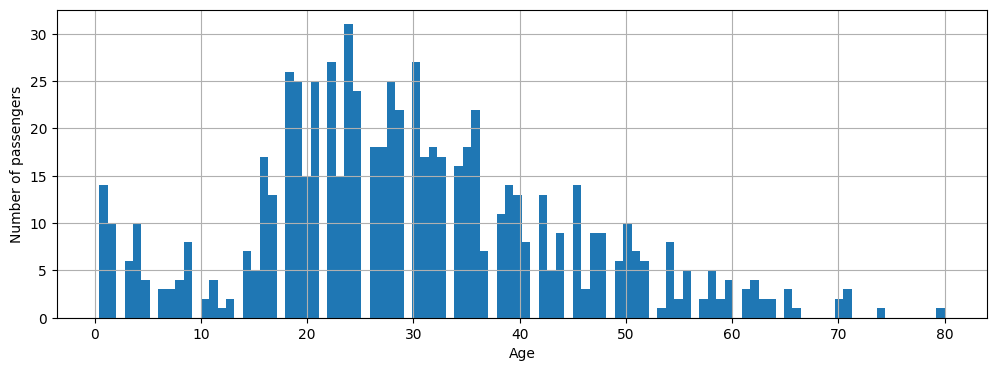

In [ ]:
# print(df.isna())

titanic_dataset = pd.read_csv("/content/drive/MyDrive/Data Science/data science/Data Preprocessing/secondLab/datasets/gender/train.csv")
titanic_df = pd.DataFrame(titanic_dataset)
# check how many observations we would drop
print('total passengers with values in all variables: ', titanic_df.dropna().shape[0])
print('total passengers in the Titanic: ', titanic_df.shape[0])
print(titanic_df.shape)
plt.figure(figsize=(12,4))
fig = titanic_df.Age.hist(bins=100)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

(150, 6)
Feature Scores:
         Feature        Score
0             Id  2614.883721
3  PetalLengthCm    92.082199
4   PetalWidthCm    52.604868
1  SepalLengthCm     8.227146
2   SepalWidthCm     3.122062

Selected Features (RFE):
         Feature  Selected
0             Id      True
1  SepalLengthCm      True
2   SepalWidthCm      True
3  PetalLengthCm      True
4   PetalWidthCm      True


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Feature Importance:
         Feature  Importance
0             Id    0.447774
4   PetalWidthCm    0.291524
3  PetalLengthCm    0.194906
1  SepalLengthCm    0.060025
2   SepalWidthCm    0.005770

Selected Features (Embedded):
         Feature  Selected
0             Id      True
3  PetalLengthCm      True
4   PetalWidthCm      True


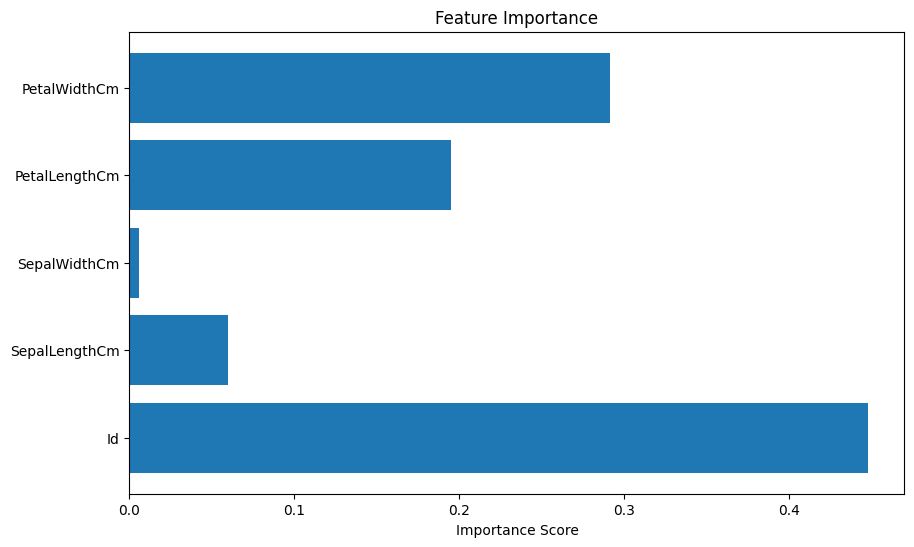

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Iris.csv')
print(data.shape)
# Replace 'target_column' with the name of your target variable
X = data.drop('Species', axis=1)
y = data['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1: Filter methods - SelectKBest with chi-squared
#chi2 for classification of categorical features
#f_classif \\ \\ of Numerical features
#mutual _info_classif: for non-linear relationships (classification)
#mutual_info_regression: \\ \\ \\ (Regression)
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X_train, y_train)

# Display the scores for each feature
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': fit.scores_})
print("Feature Scores:")
print(feature_scores.sort_values(by='Score', ascending=False))

# Method 2: Wrapper methods - Recursive Feature Elimination (RFE) with Logistic Regression
#Binar Categorical brimary used for classification
#Map any real-valued number between 0 and 1 (probabiltiy) Predicting a quantity rather than classifying data into categories
#Consider the interaction between features, don't measure each feature independently to the target variable
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)  # You can adjust the number of features to select
fit = rfe.fit(X_train, y_train)

# Display the selected features
selected_features = pd.DataFrame({'Feature': X_train.columns, 'Selected': fit.support_})
print("\nSelected Features (RFE):")
print(selected_features[selected_features['Selected']])

# Method 3: Embedded methods - Feature importance using RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Display feature importance scores
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

# Select features based on importance score
sfm = SelectFromModel(model, threshold=0.1)  # You can adjust the threshold
sfm.fit(X_train, y_train)

# Display the selected features
selected_features_embedded = pd.DataFrame({'Feature': X_train.columns, 'Selected': sfm.get_support()})
print("\nSelected Features (Embedded):")
print(selected_features_embedded[selected_features_embedded['Selected']])

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()


In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(np.c_[data['data'], data['target']],columns= np.append(data['feature_names'], ['target']))
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'], axis=1), data.target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Load the credit card dataset (assuming you have a CSV file)
credit_data = pd.read_csv('/content/drive/MyDrive/Data Science/data science/Data Preprocessing/secondLab/datasets/creditcard/creditcard.csv')

# Assuming 'Class' is the target variable and 'Amount' and 'Time' are existing features
X = credit_data.drop(['Class'], axis=1)
y = credit_data['Class']

print("Shape of the original dataset:", X.shape)

# Feature Creation: Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Example:
# Suppose you have a dataset with a single feature, [a]. Using PolynomialFeatures(degree=2), it would generate features like [a, a^2]. If the original dataset had multiple features, say [a, b], it would generate polynomial combinations like [a, b, a^2, ab, b^2].

print("Shape after creating polynomial features:", X_poly.shape)

# Feature Transformation: Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)
print("Shape after standardizing numerical features:", X_scaled.shape)

# Feature Extraction: Applying PCA to reduce dimensionality
pca = PCA(n_components=10)  # Choose an appropriate number of components
X_pca = pca.fit_transform(X_scaled)
print("Shape after PCA feature extraction:", X_pca.shape)

# Feature Selection: Selecting top K features using ANOVA F-statistic
k_best = SelectKBest(f_classif, k=5)  # Choose an appropriate value of K
X_selected = k_best.fit_transform(X_pca, y)
print("Shape after selecting top K features:", X_selected.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Now, you can use X_train and y_train for training your machine learning model.
# The features have been created, transformed, extracted, and selected based on the pipeline.


Shape of the original dataset: (284807, 30)
Shape after creating polynomial features: (284807, 496)
Shape after standardizing numerical features: (284807, 496)
Shape after PCA feature extraction: (284807, 10)
Shape after selecting top K features: (284807, 5)


**There are three types of feature selection: Wrapper methods (forward, backward, and stepwise selection), Filter methods (ANOVA, Pearson correlation, variance thresholding), and Embedded methods (Lasso, Ridge, Decision Tree).**


# **1- Filter methods**

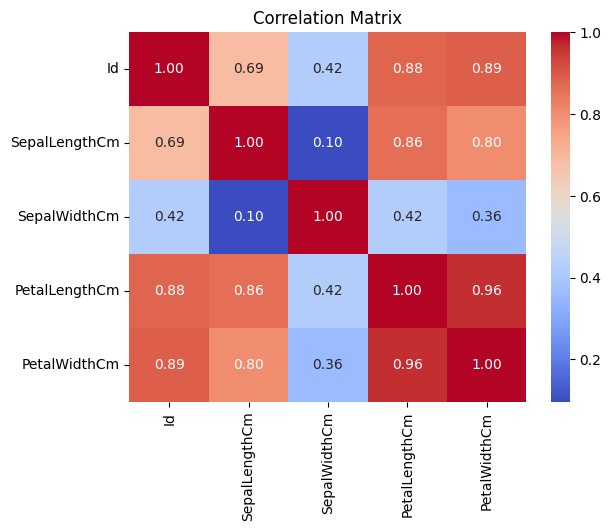

Accuracy without feature selection: 1.0
Accuracy after feature selection: 1.0


In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('./datasets/iris/Iris.csv')

# Replace 'target_column' with the name of your target variable
X = data.drop('Species', axis=1)
y = data['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Filter Method 1: Variance Thresholding
# removing features that show the same value for the majority/all of the observations (constant/almost-constant features)

var_threshold = VarianceThreshold(threshold=0.1)
X_train_var = var_threshold.fit_transform(X_train)

# Filter Method 2: SelectKBest with Mutual Information'
# Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.
k_best = SelectKBest(score_func=mutual_info_classif, k=5)  # You can adjust the number of features
X_train_kbest = k_best.fit_transform(X_train, y_train)

# Filter Method 3: Correlation Analysis
# remove features that are highly correlated with each other.. By identifying and removing such features, you can simplify the model
correlation_matrix = X_train.corr().abs()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Select highly correlated features (adjust the threshold as needed)
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Remove highly correlated features
X_train_corr = X_train.drop(columns=highly_correlated_features)

# Train a model and evaluate
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without feature selection: {accuracy}")

# Train a model and evaluate after feature selection
model.fit(X_train_corr, y_train)
y_pred_corr = model.predict(X_test[X_train_corr.columns])
accuracy_corr = accuracy_score(y_test, y_pred_corr)
print(f"Accuracy after feature selection: {accuracy_corr}")


# **2- Wrapper Metohds**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# wrapper Method 0: Exhaustive Feature Selection
# Wrapper Method 1: Recursive Feature Elimination (RFE)
# feature selection method that fits a model and removes the weakest features until the specified number of features is reached.
model_rfe = RandomForestClassifier()
rfe = RFE(model_rfe, n_features_to_select=5)  # You can adjust the number of features to select
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Display selected features after RFE
print("Selected Features after RFE:")
print(X.columns[rfe.support_])

# Train a model and evaluate after RFE
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test[X.columns[rfe.support_]])
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy after RFE: {accuracy_rfe}")

# Wrapper Method 2: Sequential Feature Selection (SFS)
# select top 5 features based on the optimal RandomForest Classifier
# forward: starts with empty set of features and starts to add features
# backward: starts with all features then starts to remove features
model_sfs = RandomForestClassifier()
sfs = SequentialFeatureSelector(model_sfs, n_features_to_select=5, direction='forward')


Selected Features after RFE:
Index(['mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')
Accuracy after RFE: 0.956140350877193


c:\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



# **3- Embedded methods:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Embedded Feature Selection using L1 Regularization (LASSO) Least absolute shrinkage and selection operator
# The key effect of L1 regularization is that it tends to shrink some of the coefficients of the model to exactly zero.
# This leads to feature selection, as the corresponding features with zero coefficients are effectively ignored by the model.
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

# Extract selected features based on non-zero coefficients
selected_features = X.columns[model.coef_[0] != 0]

# Train a model on the selected features
X_train_selected = X_train_scaled[:, model.coef_[0] != 0]
X_test_selected = X_test_scaled[:, model.coef_[0] != 0]

# Ensure that at least one feature is selected
if X_train_selected.shape[1] == 0:
    raise ValueError("No features selected. Adjust regularization or data.")

# Train a model on the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after embedded feature selection: {accuracy}")


Accuracy after embedded feature selection: 0.9736842105263158


# <font color='dodgerblue'>10- Text preprocessing</font>


In [ ]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

import spacy

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample text for demonstration
sample_text = """
Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction
between computers and humans through natural language. The ultimate objective of NLP is to read, decipher,
understand, and make sense of human languages in a valuable way.
"""
# Tokenization using NLTK
tokens_nltk = word_tokenize(sample_text)
sentences_nltk = sent_tokenize(sample_text)
# Tokenization using spaCy
doc_spacy = nlp(sample_text)
tokens_spacy = [token.text for token in doc_spacy]
sentences_spacy = [sent.text for sent in doc_spacy.sents]

# Removing stopwords using NLTK
stop_words = set(stopwords.words('english'))
filtered_tokens_nltk = [word for word in tokens_nltk if word.lower() not in stop_words]

# Removing stopwords using spaCy
filtered_tokens_spacy = [token.text for token in doc_spacy if not token.is_stop]

# Stemming using NLTK - returns the  base of the word
# computers => compute Not Computer
porter_stemmer = PorterStemmer()
stemmed_tokens_nltk = [porter_stemmer.stem(word) for word in filtered_tokens_nltk]

# Lemmatization using NLTK - understand context of word and return it to its origin
lemmatizer = WordNetLemmatizer()
lemmatized_tokens_nltk = [lemmatizer.lemmatize(word) for word in filtered_tokens_nltk]

# Lemmatization using spaCy
lemmatized_tokens_spacy = [token.lemma_ for token in doc_spacy if not token.is_stop]

# Displaying the results
print("Original Text:")
print(sample_text)

print("\nTokenization using NLTK:")
print(tokens_nltk)

print("\nTokenization using spaCy:")
print(tokens_spacy)

print("\nSentences using NLTK:")
print(sentences_nltk)

print("\nSentences using spaCy:")
print(sentences_spacy)

print("\nFiltered Tokens (NLTK - Stopwords removed):")
print(filtered_tokens_nltk)

print("\nFiltered Tokens (spaCy - Stopwords removed):")
print(filtered_tokens_spacy)

print("\nStemmed Tokens (NLTK):")
print(stemmed_tokens_nltk)

print("\nLemmatized Tokens (NLTK):")
print(lemmatized_tokens_nltk)

print("\nLemmatized Tokens (spaCy):")
print(lemmatized_tokens_spacy)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Original Text:

Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction
between computers and humans through natural language. The ultimate objective of NLP is to read, decipher,
understand, and make sense of human languages in a valuable way.


Tokenization using NLTK:
['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'the', 'interaction', 'between', 'computers', 'and', 'humans', 'through', 'natural', 'language', '.', 'The', 'ultimate', 'objective', 'of', 'NLP', 'is', 'to', 'read', ',', 'decipher', ',', 'understand', ',', 'and', 'make', 'sense', 'of', 'human', 'languages', 'in', 'a', 'valuable', 'way', '.']

Tokenization using spaCy:
['\n', 'Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'the', 'interaction', '\n', 'between', 'computers', 'and', 'humans', 'th